# Assignment 2

## 1) Derive problem equations

In [1]:
import numpy as np

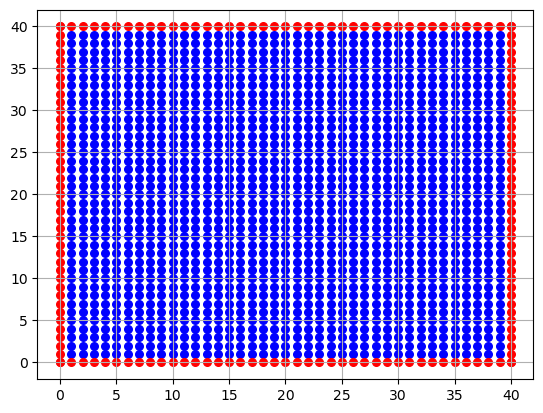

In [43]:
# plot the grid

import matplotlib.pyplot as plt
import itertools

# define the lower and upper limits for x and y
minX, maxX, minY, maxY = 1, 39, 1, 39
# create one-dimensional arrays for x and y
x = np.linspace(minX, maxX, (maxX-minX)+1)
y = np.linspace(minY, maxY, (maxY-minY)+1)

horizontal_peripheral_pts = itertools.product(range(41), (0, 40))
vertical_peripheral_pts = itertools.product((0, 40), range(41))
pts = itertools.product(x, y)
plt.scatter(*zip(*pts), marker='o', s=30, color='blue')
plt.scatter(*zip(*horizontal_peripheral_pts), marker='o', s=30, color='red')
plt.scatter(*zip(*vertical_peripheral_pts), marker='o', s=30, color='red')

X, Y = np.meshgrid(x, y)
plt.grid()
plt.show()


In [2]:
def K_matrix_generation(grid_dim):
    
    grid_dim_squared = grid_dim**2
    line_multiple = grid_dim - 1 
    K = np.zeros((grid_dim_squared, grid_dim_squared))
    # iterate over the lines of the matrix
    for i in range(grid_dim_squared):
        np.fill_diagonal(K, 4)
        # if the left neighbor on same x axis then assign -1
        if (i-1>=0) and (i-1<=grid_dim_squared-1):
            K[i][i-1] = -1
        # if the right neighbor on same x axis then assign -1
        if (i+1>=0) and (i+1<=grid_dim_squared-1):
            K[i][i+1] = -1
        if (i-1-line_multiple>=0) and (i-1-line_multiple<=grid_dim_squared-1):
            K[i][i-1-line_multiple] = -1  
        if (i+1+line_multiple>=0) and (i+1+line_multiple<=grid_dim_squared-1):
            K[i][i+1+line_multiple] = -1  
    return K


K = K_matrix_generation(39)

In [3]:
K

array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  4., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  4., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  4.]])

In [4]:
def b_vector_generation(grid_dim, r):

    h = 1 / (grid_dim + 1)
    b = np.zeros((grid_dim, grid_dim))

    for x_minus_1 in range(grid_dim):
        x = (x_minus_1 + 1) * h
        for y_minus_1 in range(grid_dim):
            y = (y_minus_1 + 1) * h
            b[x_minus_1][y_minus_1] = 100 * np.exp(-((x-0.55)**2 + (y-0.45)**2) / r)
    
    return (h**2) * b

In [5]:
def solve_linear_system(K, b):
    grid_dim = b.shape[0]
    b_flattened = b.flatten()
    t = np.linalg.solve(K, b_flattened)
    return t



In [6]:
grid_dimension = 39

# solve equation for t, taking a randomly generated r
r_mean_value = 0.05
r_s_value = 0.005
r = np.random.normal(r_mean_value, r_s_value)
print(f'Sampled r={r}.')

b = b_vector_generation(grid_dimension, r=r)

t = solve_linear_system(K, b)


# add to T padding for where T(x,y)=0
t = t.reshape(grid_dimension, grid_dimension)
t = np.pad(t, 1, 'constant')


Sampled r=0.053980481684653574.


In [7]:
print(f'Shape of t is: {t.shape[0]}x{t.shape[1]}')

Shape of t is: 41x41


In [8]:
t

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09753253, 0.13437531, ..., 0.19448271, 0.21197044,
        0.        ],
       [0.        , 0.25574147, 0.28816328, ..., 0.37952153, 0.3976553 ,
        0.        ],
       ...,
       [0.        , 0.44723827, 0.4351445 , ..., 0.31423375, 0.28247199,
        0.        ],
       [0.        , 0.23817483, 0.22291153, ..., 0.14633421, 0.10720489,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

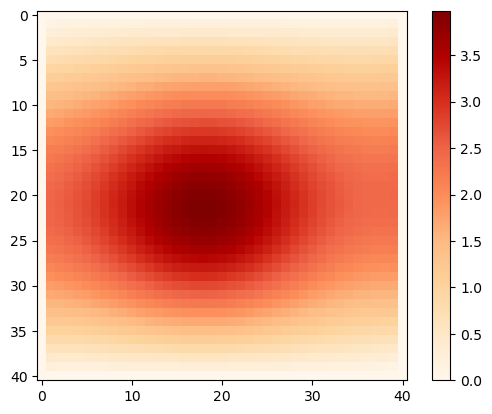

In [18]:
import matplotlib.pyplot as plt

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='OrRd')
    plt.colorbar()
    plt.show()

heatmap2d(t)

## 2) Monte Carlo Simulation
- independent variable: r (sampled from known pdf)
- dependent variable: t (solving linear system of equations)

We run a number of simulations, where we generate values for r, from which we can then calculate the t table and the value in the point (0.5, 0.5) which is the center of the grid. This point corresponds to the (20, 20) point in the t table.


In [19]:
t[20, 20]

3.897747283488659

In [22]:
mc_sims = 20000  # number of simulations

t_center = np.array([])  # t values for point (0.5, 0.5) in the center of the plate (in grid has idxs (20, 20))

for sim in range(mc_sims):
    # sample r value
    r = np.random.normal(r_mean_value, r_s_value)

    # calculate t temperatures table
    b = b_vector_generation(grid_dimension, r=r)
    t = solve_linear_system(K, b)
    t = t.reshape(grid_dimension, grid_dimension) 
    t = np.pad(t, 1, 'constant')   # add to T padding for where T(x,y)=0 - default padding value is 0 therefore omitted

    t_center = np.append(t_center, t[20, 20])

In [25]:
t_center.shape

(20000,)

# Spyros

In [180]:

def b_vector(ppdim = 39, r = 0.05):

    b, idx = np.empty(ppdim**2), 0
    h = 1/(ppdim+1)
    for i in range(0,ppdim):
        for j in range(0,ppdim):
            x, y = (i+1)*h, (j+1)*h # lattice points
            b[idx] = (h**2)*100.0*np.exp(-((x-0.55)**2+(y-0.45)**2)/r)
            idx += 1
    return b

def solve_system(invK, ppdim = 39, r = 0.05, full=True):

    b = b_vector(ppdim, r)
    t = np.matmul(invK,b) # Kt = b
    if full:
        t = t.reshape(ppdim,ppdim) # bring into grid form
        t = np.pad(t, 1, mode='constant') # add border
        t = t.T
    return t

In [191]:
t_spyros = solve_system(np.linalg.inv(K))
t_spyros

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09048101, 0.23726217, ..., 0.41502764, 0.22100787,
        0.        ],
       [0.        , 0.12465506, 0.26732865, ..., 0.40379783, 0.2068372 ,
        0.        ],
       ...,
       [0.        , 0.18044428, 0.35213349, ..., 0.29159044, 0.13578374,
        0.        ],
       [0.        , 0.19666479, 0.36895171, ..., 0.26212116, 0.09947792,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])